# MLflow Model Tracking & Experimentation

## What is MLflow?
MLflow is an open-source platform for managing the complete machine learning lifecycle. It helps data scientists track experiments, package code into reproducible runs, and deploy models to production.

## Why Use MLflow?
- **Experiment Tracking**: Record parameters, metrics, and artifacts from each training run
- **Reproducibility**: Recreate any experiment with exact same conditions
- **Model Comparison**: Compare multiple model versions side-by-side  
- **Collaboration**: Share results and models with team members
- **Model Deployment**: Transition models from development to production

## Key MLflow Concepts

### 1. Experiments & Runs
- **Experiment**: A collection of runs for a specific ML problem (e.g., "Iris Classification")
- **Run**: A single execution of your ML code with specific parameters

### 2. What We Track in Each Run
- **Parameters**: Model hyperparameters and configuration settings
- **Metrics**: Performance measurements (accuracy, precision, recall, etc.)
- **Artifacts**: Output files (trained models, plots, datasets)
- **Metadata**: Environment info, code version, timestamps

## This notebook's Goal
We'll take our Iris classification model from the previous notebook and log everything to MLflow for:
- Easy experiment comparison
- Model versioning
- Reproducible results
- Professional ML workflow

## 1. Load functions from the previous notebook to have the model and metrics to log in MLflow


Creating visualizations...
Visualization saved as '../images/model_results.png'


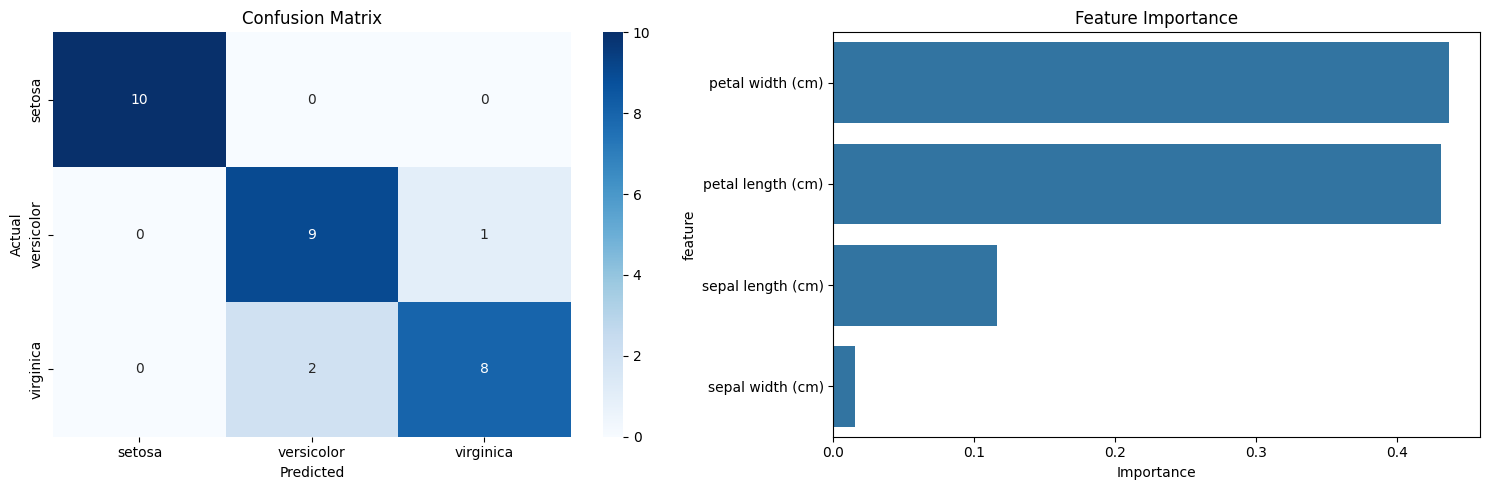

✅ Model training and evaluation complete!


In [5]:
# Step 1: Recreate Our Model from Previous Notebook

# Import our custom functions and required libraries
import sys
sys.path.append('./src')
from src.model_pipeline import (
    create_train_test_split, 
    create_preprocessing_pipeline, 
    create_model_pipeline, 
    train_model, 
    visualize_results, 
    load_and_explore_data, 
    evaluate_model
)
import pandas as pd

# Load the Iris dataset
X, y, feature_names, target_names = load_and_explore_data()

# Create train/test split (80/20)
X_train, X_test, y_train, y_test = create_train_test_split(X, y)

# Build preprocessing pipeline (standardization)
preprocessor = create_preprocessing_pipeline()

# Create complete ML pipeline (preprocessing + RandomForest)
pipeline = create_model_pipeline(preprocessor)

# Train the pipeline on training data
trained_pipeline = train_model(pipeline, X_train, y_train)


# Evaluate model on test data
cm, accuracy, precision, recall, f1 = evaluate_model(trained_pipeline, X_test, y_test)

# Extract feature importance for analysis
feature_importance = pipeline.named_steps['rf'].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Create visualizations
fig = visualize_results(cm, target_names, feature_importance_df, fig_path="../images/model_results.png")

print("✅ Model training and evaluation complete!")

## 📁 MLflow Setup


### In your terminal, start by launching an MLflow sever
```bash
# Make sure your virtual envirpnment is activated in your terminal
source .venv/bin/activate
```

```bash
# Create MLflow directory structure
mkdir -p mlflow/artifacts
mkdir -p mlflow/database

```
```bash
# Start MLflow server with organized storage
mlflow server \
    --host 127.0.0.1 \
    --port 5000 \
    --backend-store-uri sqlite:///mlflow/database/mlflow.db \
    --default-artifact-root ./mlflow/artifacts
```

### Benefits of Organized Storage
- ✅ Clean project structure
- ✅ Easy backup and cleanup
- ✅ Gitignore-friendly (add `mlflow/` to .gitignore)
- ✅ Professional setup for team collaboration

In [ ]:
# Step 2: Setup MLflow Tracking with Organized Storage
import mlflow
import mlflow.sklearn

# Set MLflow tracking directory
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Create or set the experiment (like a project folder for related runs)
experiment_name = "iris_classification_experiment"

try:
    mlflow.set_experiment(experiment_name)
    print(f"📁 Experiment: '{experiment_name}'")
    print(f"🌐 MLflow UI: http://127.0.0.1:5000")
    
except Exception as e:
    print("❌ MLflow server connection failed!")
    print("🔧 Please start the MLflow server with organized storage:")
    print("   mlflow server --host 127.0.0.1 --port 5000 \\")
    print("     --backend-store-uri sqlite:///mlflow/database/mlflow.db \\")
    print("     --default-artifact-root ./mlflow/artifacts")
    print(f"   Error: {e}")
    raise

2026/01/18 15:36:02 INFO mlflow.tracking.fluent: Experiment with name 'iris_classification_experiment' does not exist. Creating a new experiment.


📁 Experiment: 'iris_classification_experiment'
🌐 MLflow UI: http://127.0.0.1:5000


In [ ]:
# Step 3: Log Everything to MLflow
print("📝 Logging run to MLflow...")

with mlflow.start_run(run_name="RandomForest_Iris") as run:
    
    # 1. Log Model Parameters
    print("  📊 Logging parameters...")
    rf_params = trained_pipeline.named_steps['rf'].get_params()
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("n_estimators", rf_params['n_estimators'])
    mlflow.log_param("max_depth", rf_params['max_depth'])
    mlflow.log_param("min_samples_split", rf_params['min_samples_split'])
    mlflow.log_param("min_samples_leaf", rf_params['min_samples_leaf'])
    mlflow.log_param("test_size", 0.2)  # from our train/test split
    
    # 2. Log Performance Metrics
    print("  📈 Logging metrics...")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # 3. Log the Trained Model (WITHOUT environment info)
    print("  🤖 Logging model (without conda/pip environment)...")
    mlflow.sklearn.log_model(
        sk_model=trained_pipeline,
        artifact_path="model",
        registered_model_name="iris_classifier",
        conda_env=None,  # Don't log conda environment
    )
    
    # 4. Log Visualizations as Artifacts
    print("  🎨 Logging visualizations...")
    mlflow.log_figure(fig, "model_performance_plots.png")
    
    # 5. Add Descriptive Tags
    mlflow.set_tag("model_family", "random_forest")
    mlflow.set_tag("dataset", "iris")
    
    run_id = run.info.run_id
    print(f"✅ Run logged successfully!")
    print(f"🔗 Run ID: {run_id}")

print("\n🎉 MLflow logging complete! Check the web UI to explore your tracked experiment.")
print("💡 Model logged without conda/pip environment information.")

2026/01/18 15:46:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


📝 Logging run to MLflow...
  📊 Logging parameters...
  📈 Logging metrics...
  🤖 Logging model (without conda/pip environment)...


2026/01/18 15:46:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'iris_classifier' already exists. Creating a new version of this model...
2026/01/18 15:46:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: iris_classifier, version 4


  🎨 Logging visualizations...
✅ Run logged successfully!
🔗 Run ID: 8f2e66bd68064b698273f98077b3a58e
🏃 View run RandomForest_Iris at: http://127.0.0.1:5000/#/experiments/1/runs/8f2e66bd68064b698273f98077b3a58e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1

🎉 MLflow logging complete! Check the web UI to explore your tracked experiment.
💡 Model logged without conda/pip environment information.


Created version '4' of model 'iris_classifier'.


## 🎯 What We Accomplished

✅ **Model Development**: Created and trained a RandomForest classifier  
✅ **Performance Tracking**: Logged all key metrics (accuracy, precision, recall, F1)  
✅ **Parameter Logging**: Recorded all hyperparameters for reproducibility  
✅ **Artifact Storage**: Saved model, plots, and feature importance data  
✅ **Organization**: Used proper experiment and run naming conventions  

## 💡 MLflow Best Practices

- **Consistent Naming**: Use descriptive experiment and run names
- **Complete Logging**: Always log parameters, metrics, and key artifacts  
- **Tag Everything**: Use tags to organize and filter runs
- **Document Experiments**: Add meaningful descriptions and notes